<a href="https://colab.research.google.com/github/modouktouray/100DaysOfCode/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary library and downloading the MNIST dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


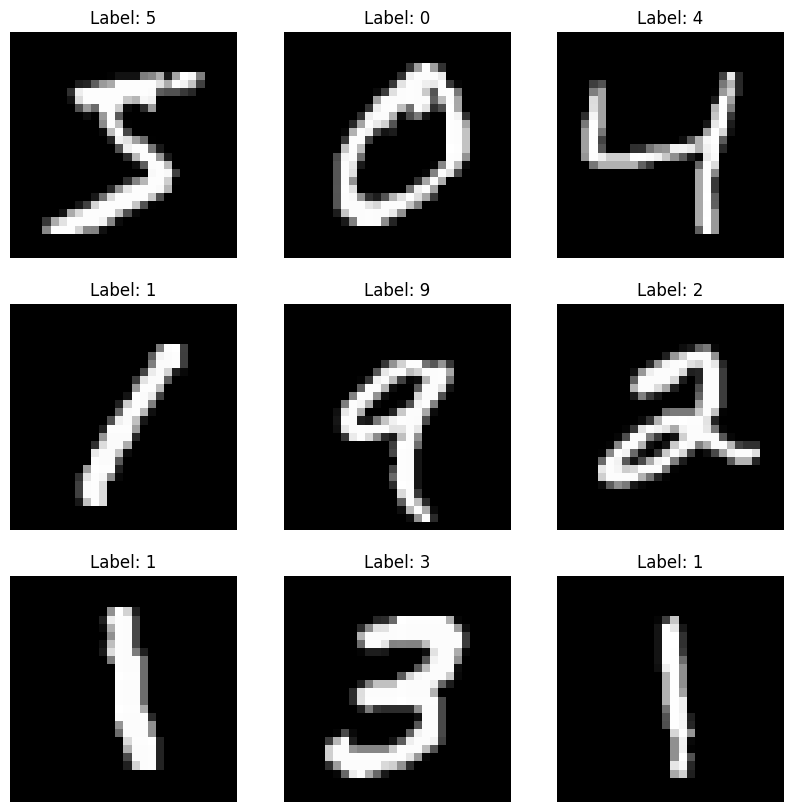

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Display 9 samples of the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()

Loading and transforming the dataset

In [ ]:
# Load MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include a single color channel and normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


Using a simple CNN with a few convolutional and pooling layers

In [ ]:
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model


Initialize and compile the model

In [ ]:

model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs and capture the history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.8015 - loss: 0.6305 - val_accuracy: 0.9792 - val_loss: 0.0598
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.9687 - loss: 0.1005 - val_accuracy: 0.9861 - val_loss: 0.0420
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.9797 - loss: 0.0708 - val_accuracy: 0.9874 - val_loss: 0.0378
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.9827 - loss: 0.0583 - val_accuracy: 0.9898 - val_loss: 0.0299
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9862 - loss: 0.0453 - val_accuracy: 0.9892 - val_loss: 0.0293
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9878 - loss: 0.0399 - val_accuracy: 0.9908 - val_loss: 0.0251
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9881 - loss: 0.0384 - val_accuracy: 0.9893 - val_loss: 0.0277
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9908 - loss: 0

Evaluation on the first model architecture

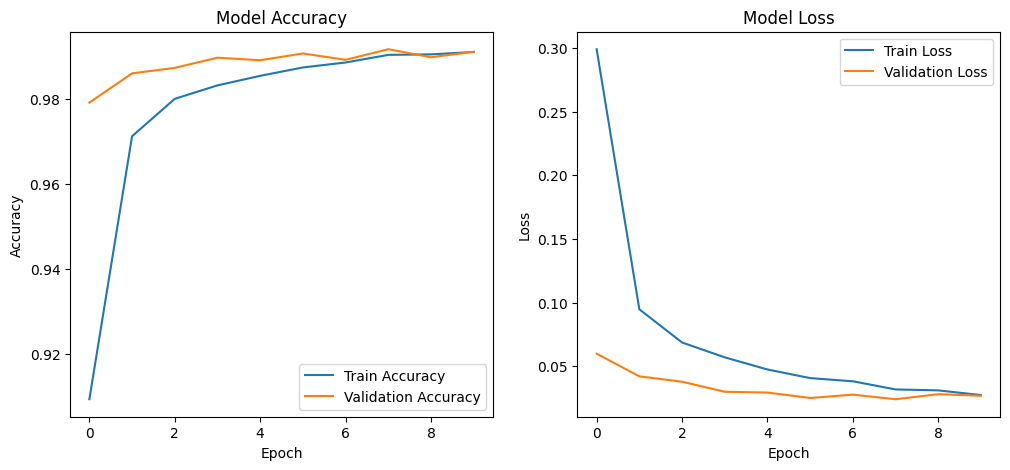

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Test on custom dataset for the first model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Processed image: image1.png
Processed image: image2.png
Processed image: image3.png
Processed image: image4.png
Processed image: image5.png
Processed image: image7.png
Processed image: image6.png
Loaded and processed 7 images.


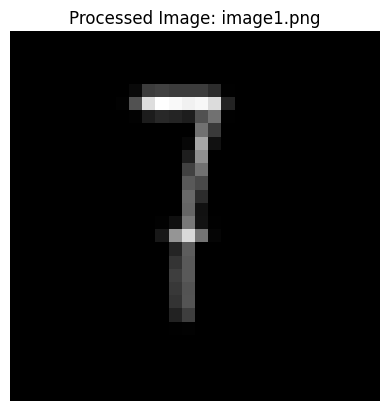

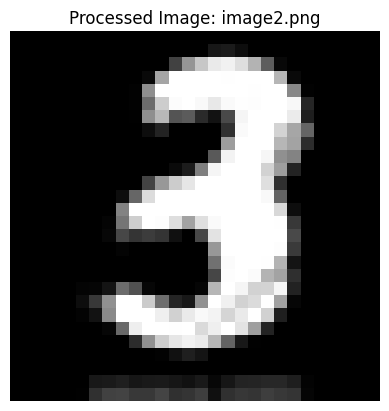

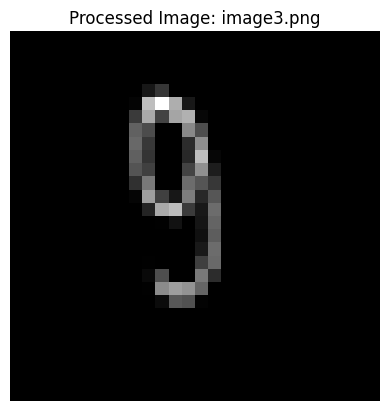

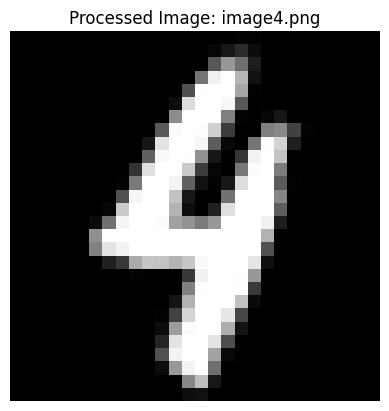

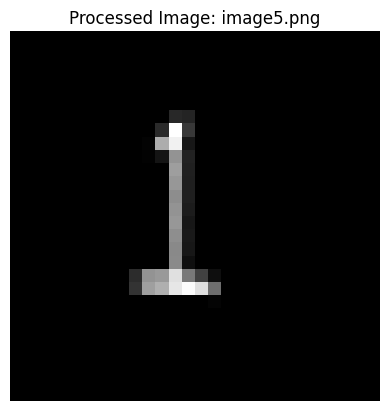

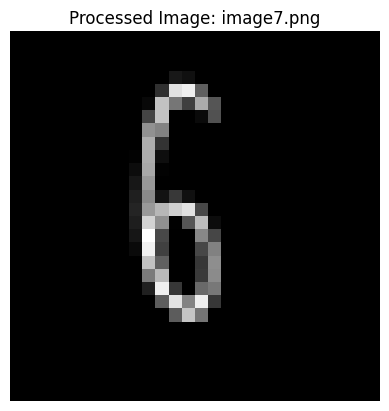

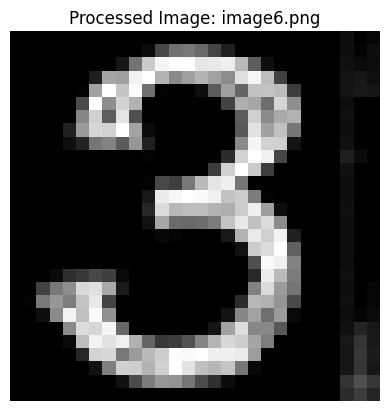

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Set the path to your folder with images in Google Drive
folder_path = '/content/drive/MyDrive/TME_6015/Assignment1'

# Initialize lists to store images and their paths
images = []
image_paths = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.jfif')):
        img_path = os.path.join(folder_path, filename)
        try:
            # Load the image
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((28, 28))  # Resize to 28x28 pixels
            img_array = np.array(img).astype('float32') / 255.0  # Normalize

            # Reshape the image to match model input shape (28, 28, 1)
            img_array = img_array.reshape(28, 28, 1)
            images.append(img_array)  # Add to images list
            image_paths.append(filename)  # Keep track of filename for display

            print(f"Processed image: {filename}")

        except Exception as e:
            print(f"Error processing image {filename}: {e}")

# Convert the list of images to a numpy array for batch prediction
images = np.array(images)
print(f"Loaded and processed {images.shape[0]} images.")

# Display the processed images (optional)
for i, img_array in enumerate(images):
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f"Processed Image: {image_paths[i]}")
    plt.axis('off')
    plt.show()


In [ ]:

true_labels = {
    'image1.png': 7,
    'image2.png': 3,
    'image3.png': 9,
    'image4.png': 4,
    'image5.png': 1,
    'image6.png': 3,
    'image7.png': 6,
}
# Predict labels for all images in the batch
predicted_classes = model.predict(images)
predicted_labels = np.argmax(predicted_classes, axis=1)

# Retrieve true labels in the correct order for accuracy calculation
true_labels_list = [true_labels[image_name] for image_name in image_paths]

# Calculate accuracy
correct_predictions = np.sum(predicted_labels == true_labels_list)
accuracy = correct_predictions / len(true_labels_list)

# Print predictions and accuracy for each image
for i, label in enumerate(predicted_labels):
    print(f"Image '{image_paths[i]}' predicted label: {label}")

print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image 'image1.png' predicted label: 3
Image 'image2.png' predicted label: 3
Image 'image3.png' predicted label: 9
Image 'image4.png' predicted label: 4
Image 'image5.png' predicted label: 3
Image 'image7.png' predicted label: 6
Image 'image6.png' predicted label: 3
Accuracy: 71.43%


Training Model for Additional Epochs to Observe Overfitting

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9938 - val_loss: 0.0207
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.9940 - loss: 0.0194 - val_accuracy: 0.9915 - val_loss: 0.0243
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9931 - val_loss: 0.0239
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9923 - val_loss: 0.0224
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9914 - val_loss: 0.0244
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.9953 - loss: 0.0147 - val_accuracy: 0.9913 - val_loss: 0.0268
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9920 - val_loss: 0.0283
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9951 - loss: 0

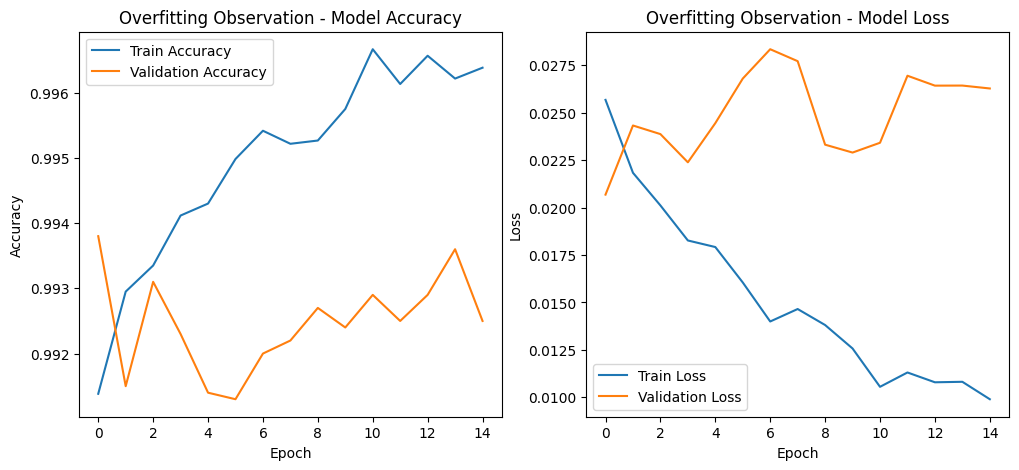

In [ ]:
# Train the model for an additional 15 epochs to observe overfitting
history_overfit = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=128)

# Plot the overfitting curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_overfit.history['accuracy'], label='Train Accuracy')
plt.plot(history_overfit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Overfitting Observation - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_overfit.history['loss'], label='Train Loss')
plt.plot(history_overfit.history['val_loss'], label='Validation Loss')
plt.title('Overfitting Observation - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Increaased the number of filters in the convolutional layer and number of units in the dense layer

In [ ]:

def create_model_config1():
    model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

model_config1 = create_model_config1()
model_config1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_config1 = model_config1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 269ms/step - accuracy: 0.8573 - loss: 0.4528 - val_accuracy: 0.9834 - val_loss: 0.0485
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 274ms/step - accuracy: 0.9797 - loss: 0.0694 - val_accuracy: 0.9882 - val_loss: 0.0324
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 275ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9914 - val_loss: 0.0258
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 270ms/step - accuracy: 0.9880 - loss: 0.0365 - val_accuracy: 0.9912 - val_loss: 0.0239
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 273ms/step - accuracy: 0.9912 - loss: 0.0294 - val_accuracy: 0.9915 - val_loss: 0.0246
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 273ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9906 - val_loss: 0.0297
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 274ms/step - accuracy: 0.9938 - loss: 0.0204 - val_accuracy: 0.9911 - val_loss: 0.0256
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 271ms/step - accuracy: 0.9937 -

Adding BatchNormalization() layers after each convolutional layer to normalize activations

In [ ]:
def create_model_config2():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

model_config2 = create_model_config2()
model_config2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_config2 = model_config2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 153ms/step - accuracy: 0.8644 - loss: 0.4549 - val_accuracy: 0.9652 - val_loss: 0.1078
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 153ms/step - accuracy: 0.9747 - loss: 0.0872 - val_accuracy: 0.9848 - val_loss: 0.0463
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 157ms/step - accuracy: 0.9805 - loss: 0.0645 - val_accuracy: 0.9880 - val_loss: 0.0328
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 152ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9882 - val_loss: 0.0382
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 159ms/step - accuracy: 0.9858 - loss: 0.0479 - val_accuracy: 0.9910 - val_loss: 0.0318
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 152ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9886 - val_loss: 0.0435
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 155ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9907 - val_loss: 0.0294
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 152ms/step - accuracy: 0.9906 - loss: 0

Changed the learning rate in the Adam optimizer to a lower rate

In [ ]:
def create_model_config3():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

model_config3 = create_model_config3()
model_config3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_config3 = model_config3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 109ms/step - accuracy: 0.5799 - loss: 1.4312 - val_accuracy: 0.9382 - val_loss: 0.2197
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.9181 - loss: 0.2780 - val_accuracy: 0.9588 - val_loss: 0.1399
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9419 - loss: 0.1993 - val_accuracy: 0.9699 - val_loss: 0.1039
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 116ms/step - accuracy: 0.9536 - loss: 0.1588 - val_accuracy: 0.9753 - val_loss: 0.0824
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - accuracy: 0.9616 - loss: 0.1317 - val_accuracy: 0.9783 - val_loss: 0.0716
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 109ms/step - accuracy: 0.9654 - loss: 0.1181 - val_accuracy: 0.9793 - val_loss: 0.0654
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - accuracy: 0.9695 - loss: 0.1060 - val_accuracy: 0.9823 - val_loss: 0.0575
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.9729 - loss: 0

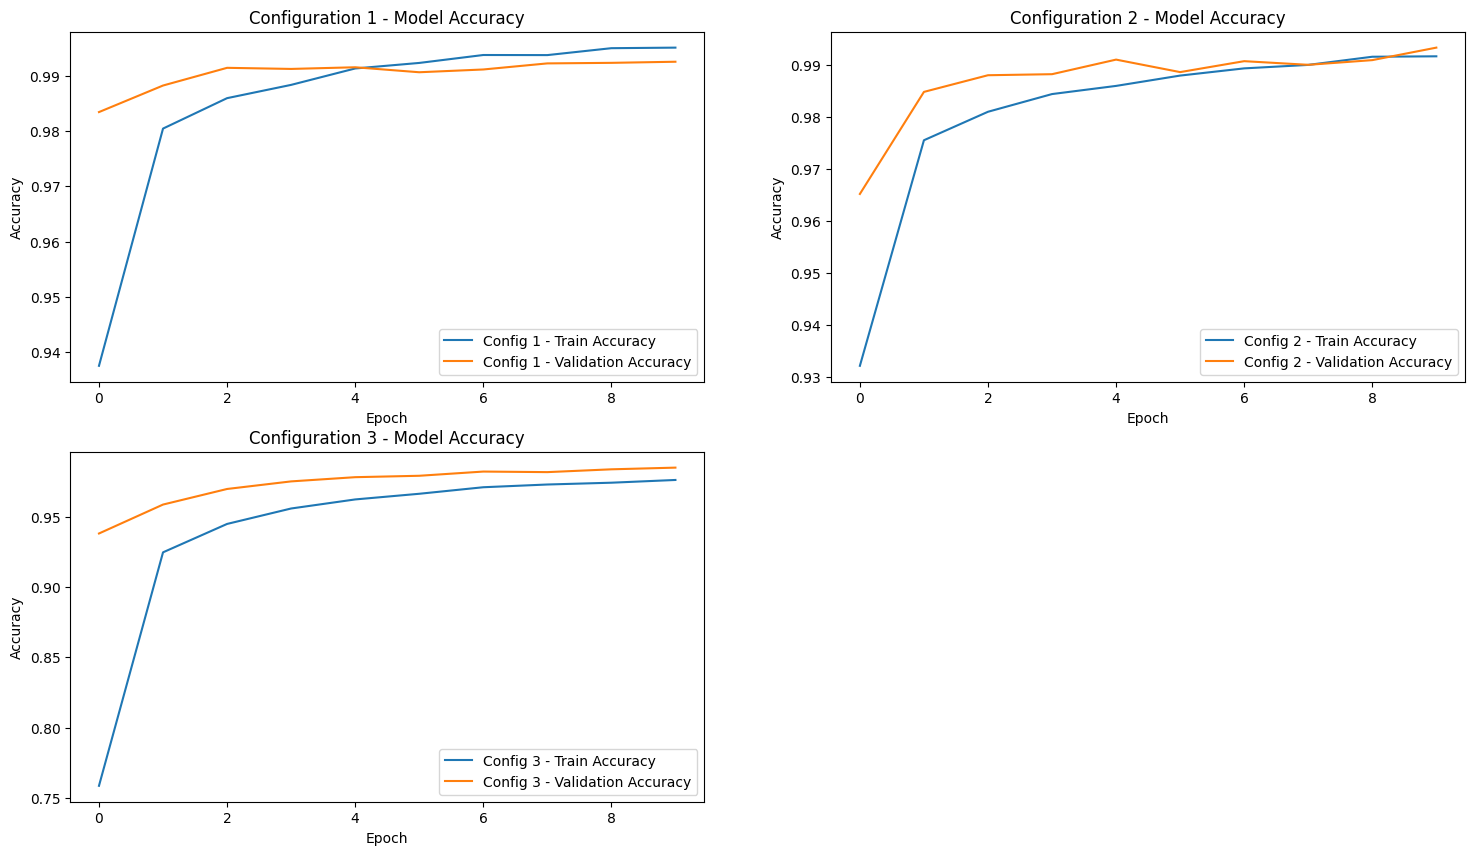

In [ ]:
# Plot the accuracy and loss curves for each configuration
plt.figure(figsize=(18, 10))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(history_config1.history['accuracy'], label='Config 1 - Train Accuracy')
plt.plot(history_config1.history['val_accuracy'], label='Config 1 - Validation Accuracy')
plt.title('Configuration 1 - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_config2.history['accuracy'], label='Config 2 - Train Accuracy')
plt.plot(history_config2.history['val_accuracy'], label='Config 2 - Validation Accuracy')
plt.title('Configuration 2 - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history_config3.history['accuracy'], label='Config 3 - Train Accuracy')
plt.plot(history_config3.history['val_accuracy'], label='Config 3 - Validation Accuracy')
plt.title('Configuration 3 - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
